In [1]:
import pandas as pd
import numpy as np
#Load common functions
# %run common.ipynb
import ipynb.fs.full.common as common

In [2]:
MML_VARIABLE_ANALYZED = 'GNPXC'
REGION = 'LAM' 
COUNTRY_COL_NAME = 'Country Name'

In [3]:
df = pd.read_excel(f"data/{REGION}/GNP_per_CAPITA_USD_2010.xlsx", sheet_name='Data')
df[0:5]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,PIB per cápita (US$ a precios constantes de 2010),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,26221.259548,27744.932097,27575.930293,28399.050131,28854.713299,30293.351539,30536.667193,29769.293907,23026.332866,NaN
1,NaN,AFE,PIB per cápita (US$ a precios constantes de 2010),NY.GDP.PCAP.KD,1175.735285,1149.360562,1209.930451,1240.088204,1263.610109,1296.490552,...,1513.369728,1534.557675,1552.987031,1556.316469,1548.813076,1546.795571,1544.077975,1534.890147,1452.730251,1477.249266
2,Afganistán,AFG,PIB per cápita (US$ a precios constantes de 2010),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,557.949692,568.964544,565.179273,556.007221,552.996908,553.355052,546.743010,555.138996,529.741210,NaN
3,NaN,AFW,PIB per cápita (US$ a precios constantes de 2010),NY.GDP.PCAP.KD,1087.639931,1085.112552,1102.499382,1157.520879,1193.689612,1214.984386,...,1779.266786,1837.285808,1894.182678,1894.322115,1846.332887,1839.113395,1843.554695,1852.861728,1788.647157,1810.927774
4,Angola,AGO,PIB per cápita (US$ a precios constantes de 2010),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,3128.324715,3168.605268,3207.178074,3127.890598,2945.968116,2845.431670,2717.474121,2612.347027,2390.478145,2331.495402


In [4]:
del df['Indicator Name']
del df['Indicator Code']
del df['Country Code']

df.columns = df.columns.astype(str)

In [5]:
def fix_countries_for_region(df, region=REGION):
    '''Matc h country column name in dataset with MML dict of country names for region.
    Unfortunately, it's a manual job. We know which names are missing according to MML, but we don't how the truth dataset named that country (if exists at all).
    
    '''
    if region == 'DEVELOPED':
        fix_countries_for_developed(df)
    if region == 'LAM':
        fix_countries_for_lam(df)
def fix_countries_for_lam(df):
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'Panamá', 'Panama')
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'Perú', 'Peru')
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'México', 'Mexico')
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'Haití', 'Haiti')
    common.replace_value_in_column(df,COUNTRY_COL_NAME, 'República Dominicana', 'Republica Dominicana')
def fix_countries_for_developed(df):
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Kirguistán','Kirguistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Macedonia del Norte','Macedonia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'República Eslovaca','Eslovaquia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Nueva Zelandia','Nueva Zelanda')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'República de Moldova','Moldavia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Kazajstán','Kazajistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Federación de Rusia','Rusia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Líbano','Libano')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'República Checa','Republica Checa')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Hungría','Hungria')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Azerbaiyán','Azerbaiyan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Japón','Japon')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Estados Unidos','EEUU')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Uzbekistán','Uzbekistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Bélgica','Belgica')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Belarús','Bielorrusia')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Tayikistán','Tayikistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Turkmenistán','Turkmenistan')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Canadá','Canada')
    common.replace_value_in_column(df,COUNTRY_COL_NAME,'Países Bajos','Paises Bajos')
    

In [6]:
print(f"Missing countries for region {REGION}")
missing_countries = common.get_missing_countries_for_region(df, COUNTRY_COL_NAME, REGION)
print(missing_countries)
fix_countries_for_region(df)
missing_countries = common.get_missing_countries_for_region(df, COUNTRY_COL_NAME, REGION)
print("Missing countries for region after fix")
print(missing_countries)

Missing countries for region LAM
{'Republica Dominicana', 'Peru', 'Panama', 'Mexico', 'Haiti'}
Missing countries for region after fix
set()


In [7]:
df_truth = common.get_countries_for_region(df, COUNTRY_COL_NAME, REGION)
assert len(df_truth) == len(common.regions[REGION]['countries']), 'MISSING COUNTRIES FOR REGION'

In [8]:
years_filtered = np.arange(1970,2019,2)
columns_filter = np.append([COUNTRY_COL_NAME],years_filtered)

df_truth = df_truth[columns_filter]
assert 0 == df_truth.isna().sum().sum(), "MISSING VALUES. CONSIDER FILL STRATEGY" #If 0, then we don't have missing values.
assert not (df_truth == 0).any().any(), "CELLS WITH 0" 

AssertionError: MISSING VALUES. CONSIDER FILL STRATEGY

## MISSING VALUES PATCH
We don't have information for **Venezuela**.
Try to get it, and then inject it in dataset.
In the meantime, will fill those values with 

In [9]:
# df_truth[df_truth.isna().any(axis=1)][['Country Name', '1970', '1972', '1974', '1976', '1978', '1980', '1982', '1984',
#        '1986', '1988', '1990', '1992', '1994', '1996', '1998', '2000']]

if REGION == 'LAM':
    whole_mean = df_truth.mean().mean()
    df_truth.loc[df_truth[COUNTRY_COL_NAME]=='Venezuela', ['1970', '1972', '1974', '1976', '1978', '1980', '1982', '1984',
           '1986', '1988', '1990', '1992', '1994', '1996', '1998', '2000',
           '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016',
           '2018']] = whole_mean


df_truth[df_truth[COUNTRY_COL_NAME]=='Venezuela']

/tmp/ipykernel_309/3106467673.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  whole_mean = df_truth.mean().mean()


,Country Name,1970,1972,1974,1976,1978,1980,1982,1984,1986,...,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018
254,Venezuela,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,...,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845,5342.048845


Finally, we got our truth dataframe. Now, MML

In [10]:
df_mml = common.get_mml_data(REGION)
df_mml = df_mml[['Year',MML_VARIABLE_ANALYZED]]
df_mml = df_mml[df_mml.Year <= 2018]
df_mml[MML_VARIABLE_ANALYZED] = df_mml[MML_VARIABLE_ANALYZED] * 6.5 #TODO. ACA ES DONDE NECESITAMOS LA VALIDACION DE IGAL.
df_mml[0:3]

,Year,GNPXC
0,1960,2416.70
1,1962,2479.10
2,1964,2578.55


Ok, that was easy. Back to truth df. 
We need to transpose df, and group by some condition

In [11]:
df_T = df_truth.copy().set_index(COUNTRY_COL_NAME).T
df_T = df_T.reset_index().rename(columns={"index": "Year"})
df_truth = df_T.astype({'Year': 'int64'})
df_truth['mean'] = df_truth.iloc[:, 1:len(common.regions[REGION]['countries'])+1].mean(axis=1)
df_truth_aggs = df_truth[['Year','mean']]

In [12]:
df_comparison = pd.merge(df_mml,df_truth_aggs,on='Year').rename(columns={MML_VARIABLE_ANALYZED: "mml_value", "mean":"truth_mean"})
df_comparison[0:3]

,Year,mml_value,truth_mean
0,1970,2895.75,3699.622559
1,1972,2943.20,3928.488989
2,1974,3003.00,4119.347288


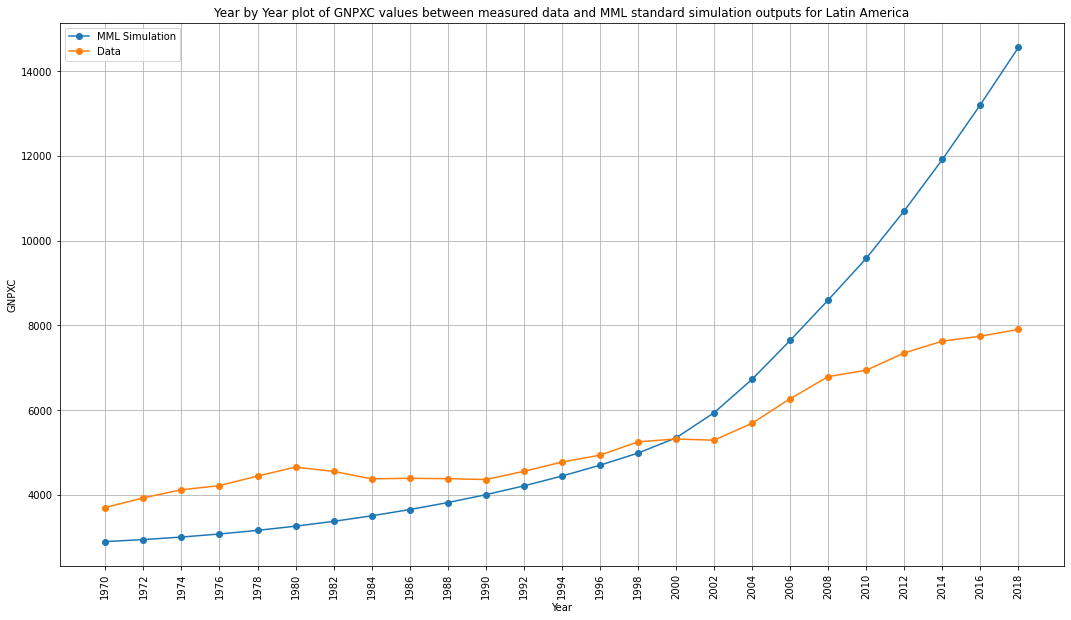

In [13]:
common.compare_mml_vs_truth_line_plot(df=df_comparison, x_col_name='Year', y_col_mml='mml_value', y_col_truth='truth_mean',variable_analyzed=MML_VARIABLE_ANALYZED, region=REGION)

### Error visualization

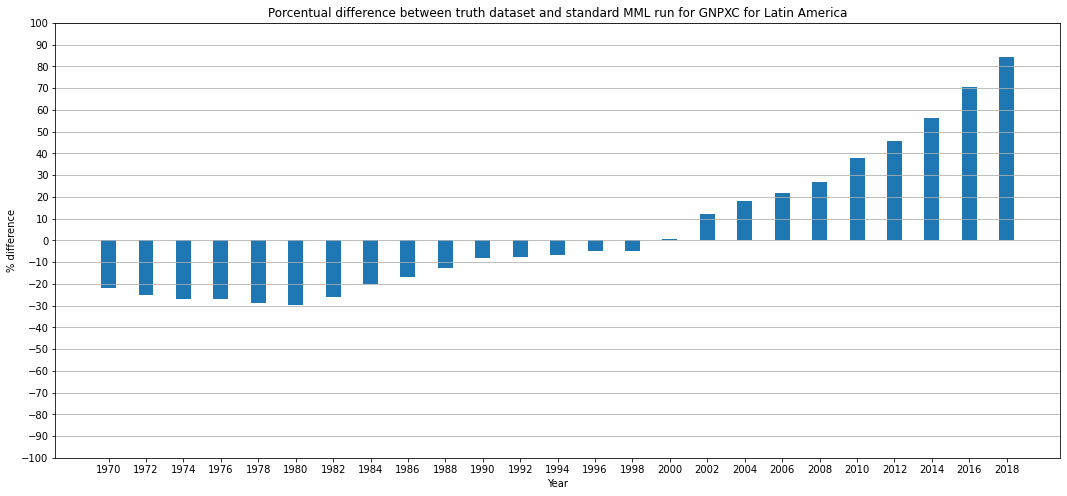

In [14]:
common.compute_porcentual_diff_between_truth_and_mml(df_comparison,'mml_value', 'truth_mean')
common.porcentual_diff_plot(df_comparison,MML_VARIABLE_ANALYZED, REGION, years_filtered, np.arange(-100,101,10))

In [15]:
common.save_porcentual_diff_to_excel_for_variable(df_comparison, MML_VARIABLE_ANALYZED, REGION)